In [10]:
from control import *
import control.matlab as ml
import numpy as np
import sympy as sym

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("bright")

# Case 4

##### Q1

1

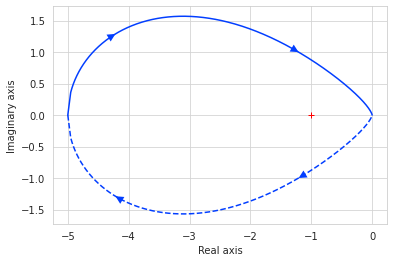

In [3]:
G4_1 = tf(50, [1, 4, -7, -10])
nyquist_plot(G4_1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


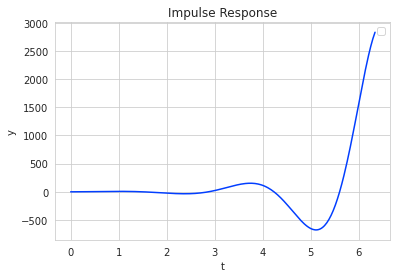

In [4]:
Phi4_1 = feedback(G4_1, 1)
t4_1, y4_1 = impulse_response(Phi4_1)
plt.plot(t4_1, y4_1)

plt.title('Impulse Response')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Q2

In [5]:
K = sym.symbols('K')
def G4_2(K):
    G = tf([K, K], [1, 6, 13, 10])
    return G

K_span = np.linspace(1, 100, 10000)
acc = 0.1
for K in K_span:
    gm, pm, wcg, wcp = margin(G4_2(K))
    if abs(pm - 45) < acc:
        print(K)
        break

43.504950495049506


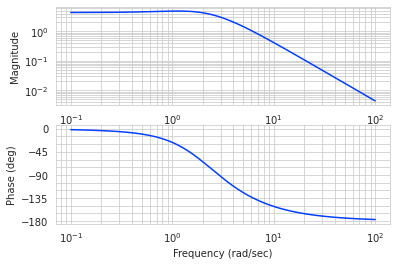

In [6]:
_ = bode_plot(G4_2(43.50))

# Case 5

Q1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


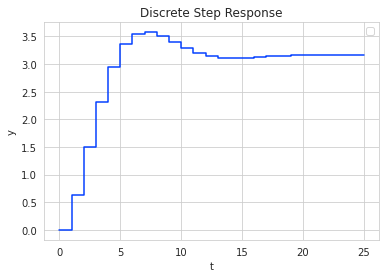

In [72]:
G5_1 = tf(0.632, [1, -1.368, 0.568], dt=True)
t = np.arange(30)
y = np.ones(30)
for i in range(15):
    y[2 * i] = -1

t5_1, y5_1 = step_response(G5_1)
plt.step(t5_1, y5_1)

plt.title('Discrete Step Response')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

# Case 6

Q1

In [48]:
s = sym.symbols('s')
k = sym.symbols('K_1 K_2')
A = np.matrix([[-2, -3], [4, -9]])
B = np.matrix([3, 1]).T
K = sym.Matrix([k[0], k[1]]).T
I = sym.eye(2)
delta = (s*I - A - B*K).det()
delta

-3*K_1*s - 24*K_1 - K_2*s - 14*K_2 + s**2 + 11*s + 30

In [38]:
p = np.array([-1+2j, -1-2j])
place(A, B, p)

matrix([[-5.61111111,  7.83333333]])

Q2

In [58]:
l = sym.symbols('L_1 L_2 L_3')
A = sym.Matrix([[1, 0, 0], [0, 2, 1], [0, 0, 2]])
B = np.array([1, 0, 1]).T
C = np.array([1, 1, 0])
L = sym.Matrix([l[0], l[1], l[2]])
I = np.eye(3)
delta = (s*I - A + L*C).det()
delta_star = (s+3)*(s+4)*(s+5)
sym.expand(delta_star)

array([1, 1, 0])

In [67]:
p = np.array([-3, -4, -5])
A = np.array([[1, 0, 0], [0, 2, 1], [0, 0, 2]]).T
C = np.matrix([1, 1, 0]).T
place(A, C, p)

matrix([[ 120., -103.,  210.]])